Universidad del Valle de Guatemala
##Mineria de Datos
Martin Amado 19020
Laura Tamath 19365
Juan Pablo Pineda 19087

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
# import pyclustertend 
import random

In [32]:
DF = pd.read_csv("movies.csv", encoding="latin1")

1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [33]:
xScale = []
for column in DF.columns:
    try:
        column
        DF[column] = (DF[column]-DF[column].mean())/DF[column].std()
        if column == "id" or column == "productionCoAmount" or column == "productionCountriesAmount" or column == "genresAmount":
            continue
        xScale.append(DF[column])
    except:
        continue

In [34]:
normDF = DF.dropna(subset=['budget', 'revenue', 'actorsPopularity', 'popularity', 'voteAvg', 'voteCount', 'actorsAmount', 'castWomenAmount', 'castMenAmount'], inplace=True)
X = np.array(DF[['budget', 'revenue', 'actorsPopularity', 'popularity', 'voteAvg', 'voteCount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']])

Variables que no aportan información:
    id porque es numerica secuencial y no provee información útil.
    original_title, originalLanguage, title, homePage, video, director, genres, productionCompany, productionCompanyCountry, productionCountry, releaseDate, actors, actorsCharacter porque estas variables que expresan una cualidad, característica y/o modalidad. 
    productionCoAmount, productionCountriesAmount, genresAmount porque no son variables que aportan información valiosa, únicamente desmuestran cantidades.

In [35]:
random.seed(123)
X_Scale = sklearn.preprocessing.scale(X)
pyclustertend.hopkins(X, len(X))

ValueError: could not convert string to float: '22.225|23.519|17.816|19.893|9.027|7.147|7.769|6.476|7.906|12.838|17.988|20.027|4.47|0.6|1.286|23.95|22.082|3.44|27.973|19.062|2.688|2.079|1.008|7.647|0.6'

## Pregunta 3
Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

In [ ]:
numeroClusters = range(1,11)
wcss = []
for k in numeroClusters:
    try:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X_Scale)
        wcss.append(kmeanModel.inertia_)
    except:
        continue
plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

Luego de obtener el gráfico de codo y analizarlo se determinó que se utilizarán 2 grupos ya que es donde se observa un codo mas pronunciado en el gráfico.

## Pregunta 4
Utilice 3 algoritmos existentes para agrupamiento. Compare los resultados generados por cada uno. 
Referencia: https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/

Agrupamiento K-means

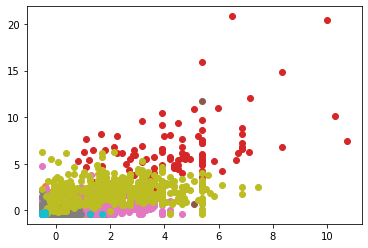

In [56]:
kmeans_result = kmeanModel.predict(X_Scale)
kmeans_clusters = np.unique(kmeans_result)
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = np.where(kmeans_result == kmeans_cluster)
    # make the plot
    plt.scatter(X_Scale[index, 0], X_Scale[index, 1])
plt.show()

Agrupamiento BIRCH


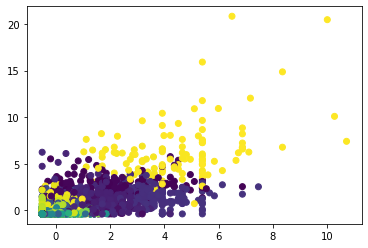

In [48]:
#Definir el modelo
birchModel = Birch(threshold=0.03,  n_clusters=None)
#Entrenar el modelo
birchModel.fit(X_Scale)
#Se obtienen los puntos y los clusters
result = birchModel.predict(X_Scale)
#Graficar los clusters
plt.scatter(X_Scale[:,0], X_Scale[:,1], c = result)
plt.show()

Agrupamiento DBSCAN

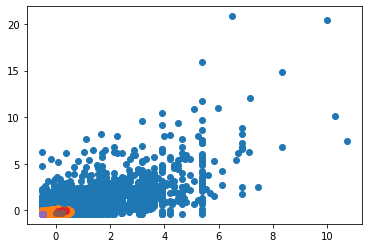

In [54]:
dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_model.fit(X_Scale)
dbscan_result = dbscan_model.fit_predict(X_Scale)
dbscan_clusters = np.unique(dbscan_result)
for dbscan_cluster in dbscan_clusters:
    index = np.where(dbscan_result == dbscan_cluster)
    plt.scatter(X_Scale[index, 0], X_Scale[index, 1])
plt.show()

## Pregunta 5
Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

## Pregunta 6
Interprete  los  grupos  basado  en  el  conocimiento  que  tiene  de  los  datos.  Recuerde  investigar  las medidas de tendencia central de las variables continuas y 
las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.